# COVID-19 PREDICTION

Jupyter notebook project for predicting the possibility of COVID-19 in a patient by learning a machine learning model. I used a collection of images from the University of Montreal as test and learning sets.

https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset/data

In [ ]:
%pip install opencv-python
%pip install tensorflow
%pip install --upgrade scipy

# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define method to load and preprocess data

In [2]:
def load_data(data_dir):
    images = []
    labels = []
    label_map = {'covid': 0, 'normal': 1, 'viral pneumonia': 2} 
    for category in label_map.keys():
        path = os.path.join(data_dir, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (128, 128))
            images.append(image)
            labels.append(label_map[category]) 
    images = np.array(images).reshape(-1, 128, 128, 1)
    labels = np.array(labels)
    return images, labels

# Load and preprocess train and test data

In [3]:
train_dir = 'train'
test_dir = 'test'
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Normalize images

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding

In [5]:
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Visualize data distribution

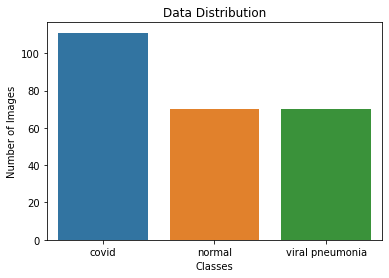

In [6]:
def plot_data_distribution(labels, label_map):
    label_names = list(label_map.keys())
    label_counts = [np.sum(labels == label_map[name]) for name in label_names]
    sns.barplot(x=label_names, y=label_counts)
    plt.title("Data Distribution")
    plt.xlabel("Classes")
    plt.ylabel("Number of Images")
    plt.show()

plot_data_distribution(y_train.argmax(axis=1), {'covid': 0, 'normal': 1, 'viral pneumonia': 2})

# Data Augmentation

In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(X_train)

# Build model

In [8]:
model = Sequential([
    Input(shape=(128, 128, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model

In [9]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), 
                    epochs=35, 
                    validation_data=(X_test, y_test))

Epoch 1/35


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 299ms/step - accuracy: 0.3656 - loss: 1.1402 - val_accuracy: 0.6818 - val_loss: 1.0421
Epoch 2/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step - accuracy: 0.5516 - loss: 1.0247 - val_accuracy: 0.8182 - val_loss: 0.7128
Epoch 3/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.6288 - loss: 0.7943 - val_accuracy: 0.6515 - val_loss: 0.6154
Epoch 4/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.7174 - loss: 0.6345 - val_accuracy: 0.6970 - val_loss: 0.4557
Epoch 5/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.6941 - loss: 0.5886 - val_accuracy: 0.8030 - val_loss: 0.4776
Epoch 6/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - accuracy: 0.7098 - loss: 0.6354 - val_accuracy: 0.6970 - val_loss: 0.5948
Epoch 7/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 314ms/step - accuracy: 0.7082 - loss: 0.6748 - val_accuracy: 0.8030 - val_loss: 0.3819
Epoch 8/35
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.7957 - loss: 0.5262 - val_accuracy: 0.8788 - val_loss: 0.3823
Epo

# Plot training history

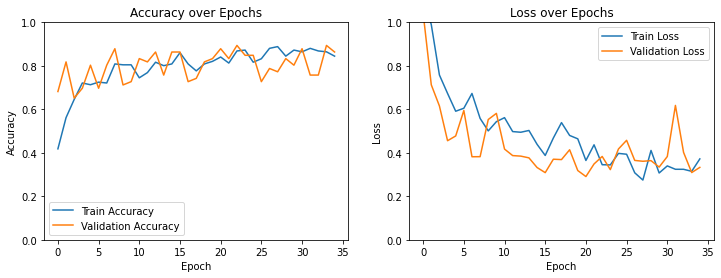

In [11]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.legend()
    
    plt.show()

plot_training_history(history)

# Evaluate model

In [12]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


# Classification report

In [13]:
print(classification_report(y_true, y_pred_classes, target_names=['covid', 'normal', 'viral pneumonia']))

                 precision    recall  f1-score   support

          covid       1.00      0.96      0.98        26
         normal       0.83      0.75      0.79        20
viral pneumonia       0.74      0.85      0.79        20

       accuracy                           0.86        66
      macro avg       0.86      0.85      0.85        66
   weighted avg       0.87      0.86      0.87        66



# Confusion matrix

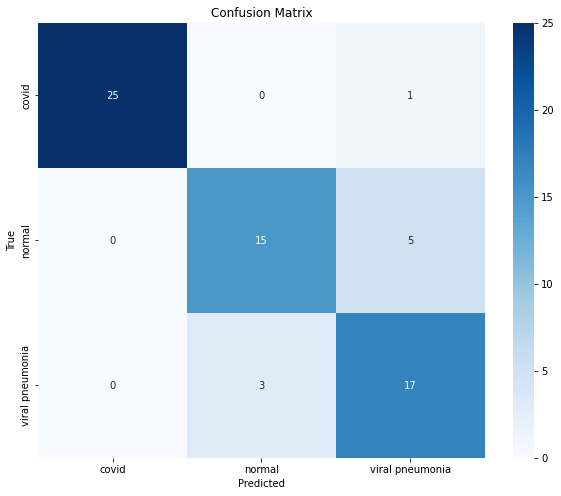

In [14]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['covid', 'normal', 'viral pneumonia'], yticklabels=['covid', 'normal', 'viral pneumonia'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Save model

In [15]:
model.save('covid_detection_model.keras')

# Load the saved model

In [16]:
model = load_model('covid_detection_model.keras')

# Function to preprocess a single image

In [17]:
def preprocess_image(img_path):
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 128))
    image = image.reshape(1, 128, 128, 1)  
    image = image / 255.0  
    return image

# Function to predict the class of a single image

In [18]:
def predict_image(img_path):
    image = preprocess_image(img_path)
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_names = ['covid', 'normal', 'viral pneumonia']
    return class_names[predicted_class]

# Model usage

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


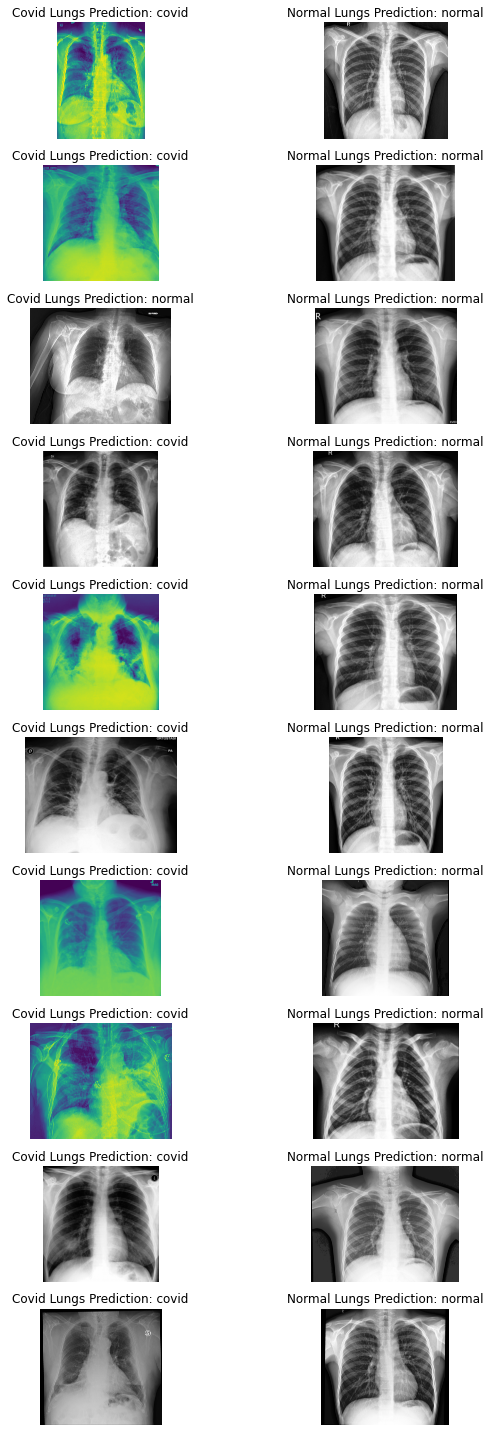

In [19]:
covid_dir = 'train/Covid'
normal_dir = 'train/Normal'

covid_images = os.listdir(covid_dir)[:10]
normal_images = os.listdir(normal_dir)[:10]

fig, axs = plt.subplots(10, 2, figsize=(10, 20))

def display_predictions(image_paths, dir_path, axs, col, true_result):
    for i, image_name in enumerate(image_paths):
        image_path = os.path.join(dir_path, image_name)
        result = predict_image(image_path)
        img = mpimg.imread(image_path)
        axs[i, col].imshow(img)
        axs[i, col].set_title(f'{true_result} Prediction: {result}')
        axs[i, col].axis('off')

display_predictions(covid_images, covid_dir, axs, 0, "Covid Lungs")

display_predictions(normal_images, normal_dir, axs, 1, "Normal Lungs")

plt.tight_layout()
plt.show()